### Short-wave dispersion relationship:

$\omega = \sqrt{gk}$

In [1]:
import numpy as np

twopi = 2 * np.pi

L = 10  # Lambda [m]
H = 20  # Water column depth [m].
N0 = 0.5  # Wave amplitude [m].
K = twopi / L  # Wave number [m^{-1}].
g = 9.8  # Gravity [m s^{-2}].
w = np.sqrt(g * K)  # Short-wave dispersion [rad s^{-1}].
T = twopi / w  # Period [s].

t = np.arange(0, 4 * T, 0.1)
z00, z02, z04, z06, z08, z10 = 0, -2, -4, -6, -8, -10  # Depths to plot.

In [2]:
HoL = H/L
if HoL > 1./2:
    print("H/L = {:.2f}: Short-wave! ".format(HoL))
else:
    print("H/L = {:.2f}: This is not a shortwave :( ".format(HoL))

H/L = 2.00: Short-wave! 


The code below solve the following equations:

Free surface displacement: $\eta = N_o\cos({kx - \omega t})$

x displacement: $\chi = -\eta_o\sin({kx - \omega t})[\cosh(kz) + \sinh(kz)]$

z displacement: $\zeta = \eta_o\cos({kx - \omega t})[\cosh(kz) + \sinh(kz)]$

In [3]:
def plot_paths(ax, x=0, color='grey', alpha=0.75, linewidth=3):
    X00 = N0 * np.sin(K * x - w * t) * (np.cosh(K * z00) + np.sinh(K * z00)) + x
    X02 = N0 * np.sin(K * x - w * t) * (np.cosh(K * z02) + np.sinh(K * z02)) + x
    X04 = N0 * np.sin(K * x - w * t) * (np.cosh(K * z04) + np.sinh(K * z04)) + x
    X06 = N0 * np.sin(K * x - w * t) * (np.cosh(K * z06) + np.sinh(K * z06)) + x
    X08 = N0 * np.sin(K * x - w * t) * (np.cosh(K * z08) + np.sinh(K * z08)) + x
    X10 = N0 * np.sin(K * x - w * t) * (np.cosh(K * z10) + np.sinh(K * z10)) + x

    Z00 = N0 * np.cos(K * x - w * t) * (np.sinh(K * z00) + np.cosh(K * z00))
    Z02 = N0 * np.cos(K * x - w * t) * (np.sinh(K * z02) + np.cosh(K * z02)) + z02
    Z04 = N0 * np.cos(K * x - w * t) * (np.sinh(K * z04) + np.cosh(K * z04)) + z04
    Z06 = N0 * np.cos(K * x - w * t) * (np.sinh(K * z06) + np.cosh(K * z06)) + z06
    Z08 = N0 * np.cos(K * x - w * t) * (np.sinh(K * z08) + np.cosh(K * z08)) + z08
    Z10 = N0 * np.cos(K * x - w * t) * (np.sinh(K * z10) + np.cosh(K * z10)) + z10
    
    kw = dict(color=color, alpha=alpha, linewidth=linewidth)
    lines = ax.plot(X00, Z00,
                    X02, Z02,
                    X04, Z04,
                    X06, Z06,
                    X08, Z08,
                    X10, Z10, **kw)
    return lines

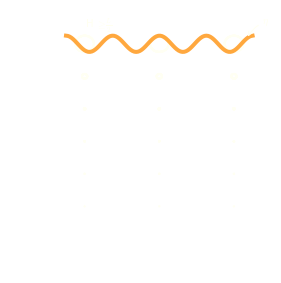

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 4))

kw = dict(color='ivory', alpha=0.75, linewidth=2)
lines0 = plot_paths(ax, x=-4, **kw)
lines1 = plot_paths(ax, x=0, **kw)
lines2 = plot_paths(ax, x=4, **kw)

ax.set_xlabel(r'Distância $\frac{m}{2\pi}$')
ax.set_ylabel('Profundidade m')

N = N0 * np.cos((K * 0) - (w * t))
xmin, xmax = ax.get_xlim()
x = np.linspace(xmin, xmax, N.size)
ax.plot(x, N, color='darkorange', linewidth=4, alpha=.75)

ax.annotate(r'$\eta$', xy=(x[-4], N[-4]),  xycoords='data',
            xytext=(15, 15), textcoords='offset points',
            color='ivory',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0.2",
                            color='ivory'))

ax.text(-4, 1, r'H $\geq \frac{L}{2}$', color='ivory')

fig.tight_layout()
ax.axis('off')
fig.savefig("deep_water_waves.svg", bbox_inches='tight',
           transparent=True)